In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
import pandas as pd

teams = ["AUS", "IND", "ENG", "WI", "PAK", "NZ", "SL", "SA", "KEN", "AFG", "BAN"]
final_points = [158, 120, 90, 82, 80, 74, 68, 40, 4, 3, 1]

# Define the updated gradient color schemes for each team
team_colors = {
    "AUS": ("#00843D", "#FFCD00"),
    "IND": ("#078BDC", "#F5895A"),
    "ENG": ("#15295E", "#FF3900"),
    "WI": ("#F2B10E", "#7B0041"),  # Maroon on top
    "PAK": ("#006629", "white"),  # Changed gold to white
    "NZ": ("black", "#C0C0C0"),  # Changed white to silver
    "SL": ("#FFCC00", "#00008B"),
    "SA": ("#F3B71A", "#0C562E"),
    "AFG": ("black", "#D32011", "#007A36"),
    "KEN": ("#008C51", "#008C51", "black"),
    "BAN": ("#006A4E", "#F42A41")
}

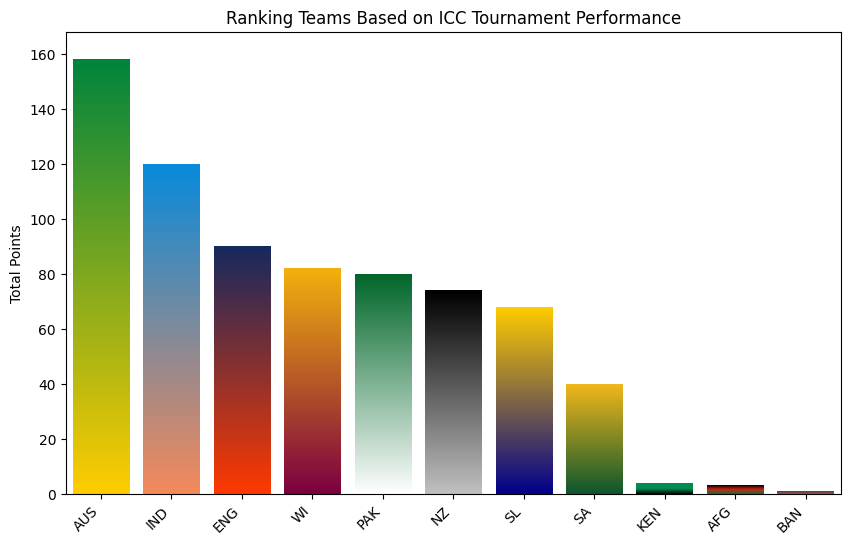

In [26]:
#First plot - Bar graph to represent the final points

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each team's bar with a gradient effect
for i, team in enumerate(teams):
    colors = team_colors[team]

    # Create a custom colormap for the gradient effect
    if len(colors) == 2:
        cmap = mcolors.LinearSegmentedColormap.from_list(team, colors)
    else:
        cmap = mcolors.LinearSegmentedColormap.from_list(team, [colors[0], colors[1], colors[2]])

    # Generate a gradient from the color map
    gradient = np.linspace(0, 1, 256).reshape(-1, 1)
    ax.imshow(gradient, extent=[i - 0.4, i + 0.4, 0, final_points[i]], cmap=cmap, aspect="auto")

# Formatting the chart
ax.set_xticks(range(len(teams)))
ax.set_xticklabels(teams, rotation=45, ha="right")
ax.set_ylabel("Total Points")
ax.set_title("Ranking Teams Based on ICC Tournament Performance")
ax.set_ylim(0, max(final_points) + 10)
ax.set_xlim(-0.5, len(teams) - 0.5)

plt.show()

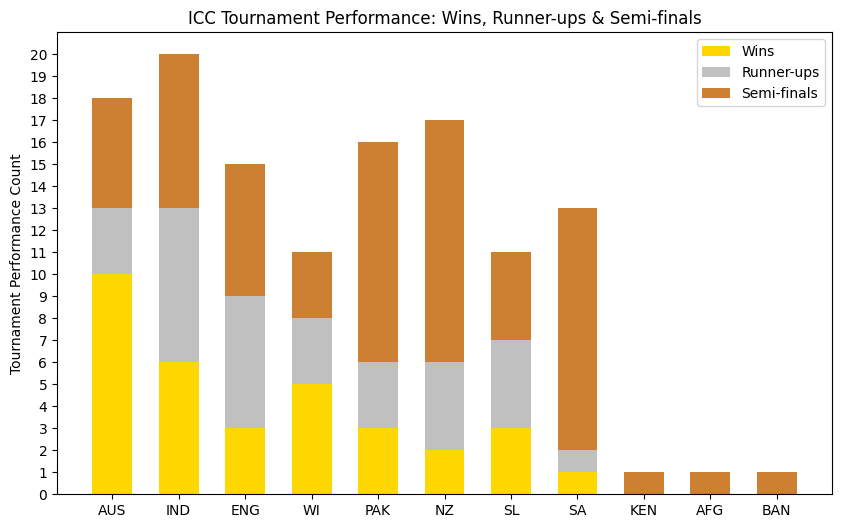

In [27]:
#Seond Plot - Stacked bar graph of wins, runner ups and SFs

# Tournament performance data (Wins, Runner-ups, Semi-finals)
wins = [10, 6, 3, 5, 3, 2, 3, 1, 0, 0, 0]
runner_ups = [3, 7, 6, 3, 3, 4, 4, 1, 0, 0, 0]
semi_finals = [5, 7, 6, 3, 10, 11, 4, 11, 1, 1, 1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.6

# Bottom position for stacking
bottom_values = np.zeros(len(teams))

# Medal colors
gold = "#FFD700"
silver = "#C0C0C0"
bronze = "#CD7F32"

# Plot stacked bars
for i, team in enumerate(teams):
    # Wins
    ax.bar(i, wins[i], color=gold, width=bar_width, label="Wins" if i == 0 else "", bottom=bottom_values[i])
    bottom_values[i] += wins[i]

    # Runner-ups
    ax.bar(i, runner_ups[i], color=silver, width=bar_width, label="Runner-ups" if i == 0 else "", bottom=bottom_values[i])
    bottom_values[i] += runner_ups[i]

    # Semi-finals
    ax.bar(i, semi_finals[i], color=bronze, width=bar_width, label="Semi-finals" if i == 0 else "", bottom=bottom_values[i])

ax.set_yticks(range(0, 21))  # Set whole numbers from 0 to max_y

# Labels and Titles
ax.set_xticks(range(len(teams)))
ax.set_xticklabels(teams)
ax.set_ylabel("Tournament Performance Count")
ax.set_title("ICC Tournament Performance: Wins, Runner-ups & Semi-finals")

# Legend
ax.legend()

# Show plot
plt.show()

In [28]:
# Creating dataframe that containts cumulative points gained by each team every year

# Define tournament weights
tournament_weights = {
    "ODI World Cup": 4,
    "T20 World Cup": 3,
    "WTC": 2,
    "Champions Trophy": 1
}

# Raw tournament data in dictionary format
tournament_data = {
    "ODI World Cup": [
        (1975, "West Indies", "Australia", ["England", "New Zealand"]),
        (1979, "West Indies", "England", ["Pakistan", "New Zealand"]),
        (1983, "India", "West Indies", ["England", "Pakistan"]),
        (1987, "Australia", "England", ["India", "Pakistan"]),
        (1992, "Pakistan", "England", ["New Zealand", "South Africa"]),
        (1996, "Sri Lanka", "Australia", ["India", "West Indies"]),
        (1999, "Australia", "Pakistan", ["South Africa", "New Zealand"]),
        (2003, "Australia", "India", ["Kenya", "Sri Lanka"]),
        (2007, "Australia", "Sri Lanka", ["South Africa", "New Zealand"]),
        (2011, "India", "Sri Lanka", ["New Zealand", "Pakistan"]),
        (2015, "Australia", "New Zealand", ["India", "South Africa"]),
        (2019, "England", "New Zealand", ["India", "Australia"]),
        (2023, "Australia", "India", ["New Zealand", "South Africa"]),
    ],
    "T20 World Cup": [
        (2007, "India", "Pakistan", ["Australia", "New Zealand"]),
        (2009, "Pakistan", "Sri Lanka", ["West Indies", "South Africa"]),
        (2010, "England", "Australia", ["Sri Lanka", "Pakistan"]),
        (2012, "West Indies", "Sri Lanka", ["Pakistan", "Australia"]),
        (2014, "Sri Lanka", "India", ["South Africa", "West Indies"]),
        (2016, "West Indies", "England", ["India", "New Zealand"]),
        (2021, "Australia", "New Zealand", ["England", "Pakistan"]),
        (2022, "England", "Pakistan", ["India", "New Zealand"]),
        (2024, "India", "South Africa", ["England", "Afghanistan"]),
    ],
    "WTC": [
        (2021, "New Zealand", "India", []),
        (2023, "Australia", "India", []),
    ],
    "Champions Trophy": [
        (1998, "South Africa", "West Indies", ["India", "Sri Lanka"]),
        (2000, "New Zealand", "India", ["Pakistan", "South Africa"]),
        (2002, "India", "Sri Lanka", ["Australia", "South Africa"]),  # Shared win (3 points each)
        (2004, "West Indies", "England", ["Pakistan", "Australia"]),
        (2006, "Australia", "West Indies", ["South Africa", "New Zealand"]),
        (2009, "Australia", "New Zealand", ["Pakistan", "England"]),
        (2013, "India", "England", ["Sri Lanka", "South Africa"]),
        (2017, "Pakistan", "India", ["Bangladesh", "England"]),
    ],
}

# Initialize a dictionary to store cumulative points over time
team_points_over_time = {}

# Process each tournament type
for tournament, records in tournament_data.items():
    weight = tournament_weights[tournament]

    for year, winner, runner_up, semi_finalists in records:
        # Initialize year in the dictionary if not present
        if year not in team_points_over_time:
            team_points_over_time[year] = {}

        # Assign points based on tournament rules
        if year == 2002 and tournament == "Champions Trophy":
            team_points_over_time[year]["India"] = team_points_over_time[year].get("India", 0) + (3 * weight)
            team_points_over_time[year]["Sri Lanka"] = team_points_over_time[year].get("Sri Lanka", 0) + (3 * weight)

        else:
            team_points_over_time[year][winner] = team_points_over_time[year].get(winner, 0) + (4 * weight)
            team_points_over_time[year][runner_up] = team_points_over_time[year].get(runner_up, 0) + (2 * weight)

        #team_points_over_time[year][runner_up] = team_points_over_time[year].get(runner_up, 0) + (2 * weight)

        for semi_finalist in semi_finalists:
            team_points_over_time[year][semi_finalist] = team_points_over_time[year].get(semi_finalist, 0) + (1 * weight)

# Convert to DataFrame for easy visualization
years = sorted(team_points_over_time.keys())
teams = sorted(set(team for year_data in team_points_over_time.values() for team in year_data))

# Create structured DataFrame
df = pd.DataFrame(index=years, columns=teams).fillna(0)

# Populate DataFrame with cumulative points
cumulative_points = {team: 0 for team in teams}

for year in years:
    for team in teams:
        cumulative_points[team] += team_points_over_time[year].get(team, 0)
        df.at[year, team] = cumulative_points[team]

# Display the structured DataFrame
df = df.astype(int)
df.head(15)

<ipython-input-28-ca69fe8998bc>:86: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.DataFrame(index=years, columns=teams).fillna(0)


,Afghanistan,Australia,Bangladesh,England,India,Kenya,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies
1975,0,8,0,4,0,0,4,0,0,0,16
1979,0,8,0,12,0,0,8,4,0,0,32
1983,0,8,0,16,16,0,8,8,0,0,40
1987,0,24,0,24,20,0,8,12,0,0,40
1992,0,24,0,32,20,0,12,28,4,0,40
1996,0,32,0,32,24,0,12,28,4,16,44
1998,0,32,0,32,25,0,12,28,8,17,46
1999,0,48,0,32,25,0,16,36,12,17,46
2000,0,48,0,32,27,0,20,37,13,17,46
2002,0,49,0,32,30,0,20,37,14,20,46


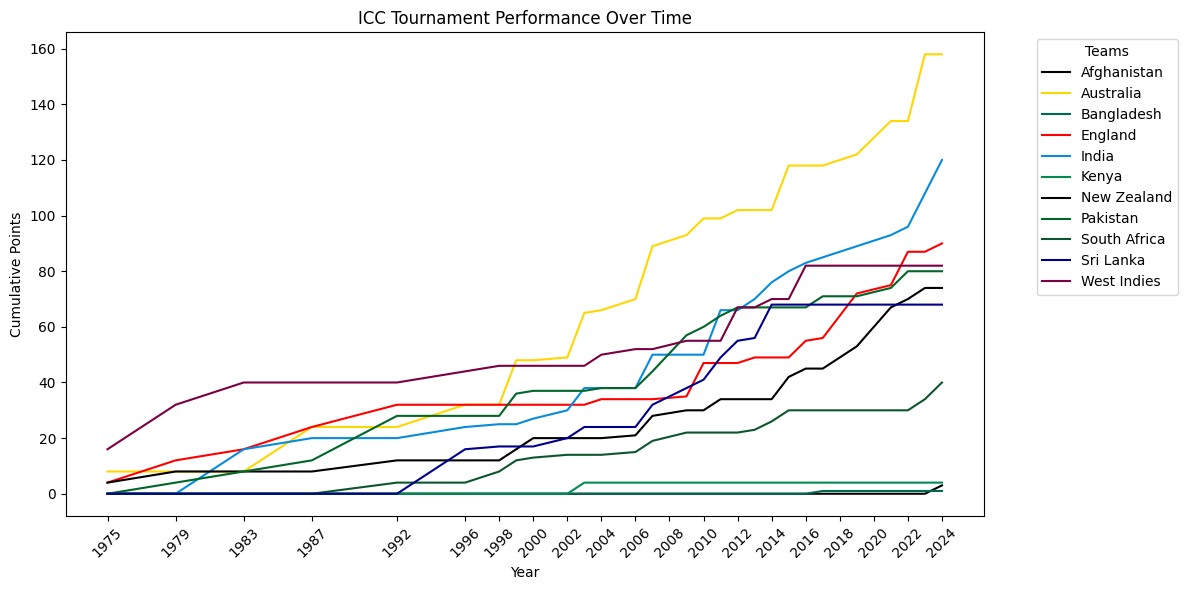

In [29]:
# Third Plot - Plotting the points gained by each team according to performances in ICC tournaments over time

# Update X-axis year formatting as per new pattern
custom_x_ticks = [1975, 1979, 1983, 1987, 1992, 1996, 1998] + list(range(2000, 2025, 2))

# Update team colors based on the new preferences
updated_team_colors = {
    "Australia": "gold",
    "India": "#078BDC",
    "England": "red",
    "West Indies": "#7B0041",
    "Pakistan": "#006629",  # Dark Green
    "New Zealand": "black",
    "Sri Lanka": "#00008B",  # Dark Blue
    "South Africa": "#0C562E",  # Green
    "Afghanistan": "black",
    "Kenya": "#008C51",
    "Bangladesh": "#006A4E"
}

# Create the figure with extra padding
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Add padding

# Plot each team's performance over time using the DataFrame
for team in df.columns:
    color = updated_team_colors.get(team, "gray")  # Use updated color scheme
    plt.plot(df.index, df[team], linestyle="-", label=team, color=color)  # No markers

# Formatting
plt.xlabel("Year")
plt.ylabel("Cumulative Points")
plt.title("ICC Tournament Performance Over Time")
plt.xticks(custom_x_ticks, rotation=45)  # Set x-axis labels with custom tick pattern
plt.yticks(range(0, 161, 20))  # Set y-axis ticks from 0 to 160 in steps of 20
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc="upper left")  # Place legend outside

# Show the plot
plt.tight_layout()
plt.show()

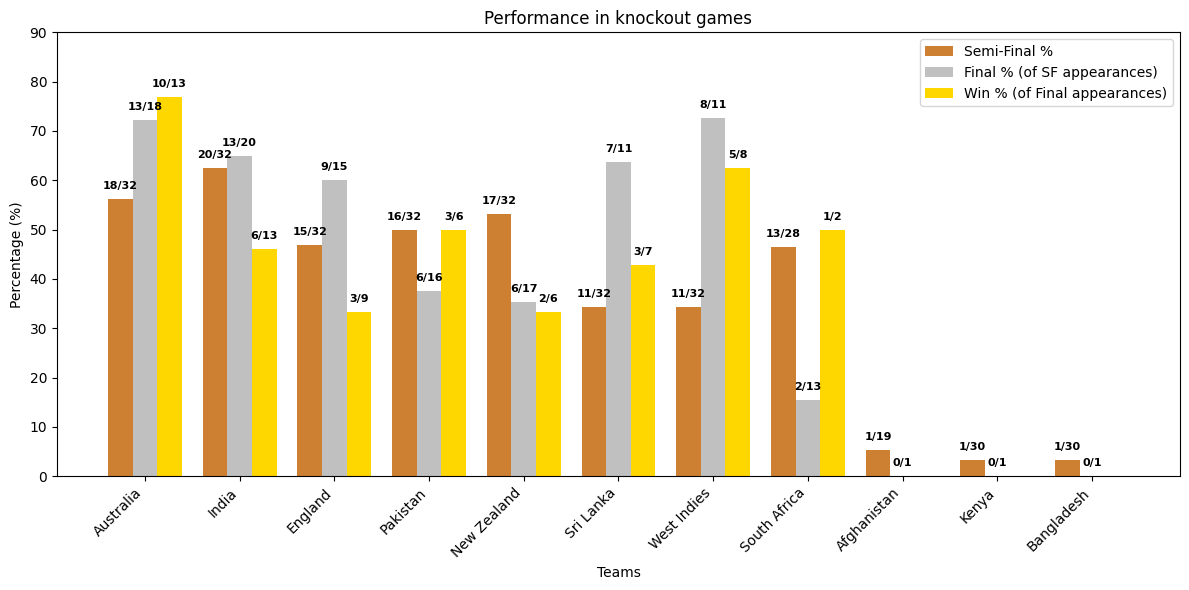

In [30]:
#Fourth Plot - Seeing each team's performance in knockout games and understanding their record under pressue

# Reconstruct the tournament participation data
tournaments_played = {
    "Australia": 32, "India": 32, "England": 32, "Pakistan": 32, "New Zealand": 32,
    "Sri Lanka": 32, "West Indies": 32, "South Africa": 28, "Afghanistan": 19,
    "Kenya": 30, "Bangladesh": 30
}

# Manually count SF, F, and W appearances
team_sf_count = {
    "Australia": 18, "India": 20, "England": 15, "Pakistan": 16, "New Zealand": 17,
    "Sri Lanka": 11, "West Indies": 11, "South Africa": 13, "Afghanistan": 1, "Kenya": 1, "Bangladesh": 1
}
team_f_count = {
    "Australia": 13, "India": 13, "England": 9, "Pakistan": 6, "New Zealand": 6,
    "Sri Lanka": 7, "West Indies": 8, "South Africa": 2, "Afghanistan": 0, "Kenya": 0, "Bangladesh": 0
}
team_w_count = {
    "Australia": 10, "India": 6, "England": 3, "Pakistan": 3, "New Zealand": 2,
    "Sri Lanka": 3, "West Indies": 5, "South Africa": 1, "Afghanistan": 0, "Kenya": 0, "Bangladesh": 0
}

# Compute percentages correctly
team_performance_corrected = {}
for team in tournaments_played.keys():
    sf_percentage = (team_sf_count[team] / tournaments_played[team]) * 100 if tournaments_played[team] > 0 else 0
    f_percentage = (team_f_count[team] / team_sf_count[team]) * 100 if team_sf_count[team] > 0 else 0
    w_percentage = (team_w_count[team] / team_f_count[team]) * 100 if team_f_count[team] > 0 else 0

    team_performance_corrected[team] = {"SF%": sf_percentage, "F|SF%": f_percentage, "W|F%": w_percentage}

# Extract corrected data for visualization
sf_percent_corrected = [team_performance_corrected[team]["SF%"] for team in tournaments_played.keys()]
f_percent_corrected = [team_performance_corrected[team]["F|SF%"] for team in tournaments_played.keys()]
w_percent_corrected = [team_performance_corrected[team]["W|F%"] for team in tournaments_played.keys()]

# Create the grouped bar chart with fraction labels
plt.figure(figsize=(12, 6))
x = np.arange(len(tournaments_played.keys()))
bar_width = 0.26

gold = "#FFD700"
silver = "#C0C0C0"
bronze = "#CD7F32"

bars_sf = plt.bar(x - bar_width, sf_percent_corrected, bar_width, label="Semi-Final %", color=bronze)
bars_f = plt.bar(x, f_percent_corrected, bar_width, label="Final % (of SF appearances)", color=silver)
bars_w = plt.bar(x + bar_width, w_percent_corrected, bar_width, label="Win % (of Final appearances)", color=gold)

# Add fraction labels on bars
for i, team in enumerate(tournaments_played.keys()):
    # SF Bar
    plt.text(x[i] - bar_width, sf_percent_corrected[i] + 2,
             f"{team_sf_count[team]}/{tournaments_played[team]}", ha="center", fontsize=8, color="black", fontweight="bold")

    # Final Bar
    if team_sf_count[team] > 0:
        plt.text(x[i], f_percent_corrected[i] + 2,
                 f"{team_f_count[team]}/{team_sf_count[team]}", ha="center", fontsize=8, color="black", fontweight="bold")

    # Win Bar
    if team_f_count[team] > 0:
        plt.text(x[i] + bar_width, w_percent_corrected[i] + 2,
                 f"{team_w_count[team]}/{team_f_count[team]}", ha="center", fontsize=8, color="black", fontweight="bold")

# Formatting
plt.xlabel("Teams")
plt.ylabel("Percentage (%)")
plt.title("Performance in knockout games")
plt.xticks(x, tournaments_played.keys(), rotation=45, ha="right")
plt.ylim(0, 90)  # Limit y-axis to 90% for better spacing
plt.legend()

# Show the corrected plot with fraction labels
plt.tight_layout()
plt.show()

In [31]:
# Toss result and match result data per era
"""
1975 - 92:
won toss and batted (wtb) = 5
won toss and fielded (wtf) = 10

won | wtb (w|b) = 3
won | wtf (w|f) = 3

loss | wtb (l|b) = 2
loss | wtf (l|f) = 7

1996 - 2007:
won toss and batted (wtb) = 18
won toss and fielded (wtf) = 11

won | wtb (w|b) = 8
won | wtf (w|f) = 5

loss | wtb (l|b) = 10
loss | wtf (l|f) = 6

2009 - 2024:
won toss and batted (wtb) = 25
won toss and fielded (wtf) = 22

won | wtb (w|b) = 10
won | wtf (w|f) = 17

loss | wtb (l|b) = 15
loss | wtf (l|f) = 5
"""

'\n1975 - 92:\nwon toss and batted (wtb) = 5\nwon toss and fielded (wtf) = 10\n\nwon | wtb (w|b) = 3\nwon | wtf (w|f) = 3\n\nloss | wtb (l|b) = 2\nloss | wtf (l|f) = 7\n\n1996 - 2007:\nwon toss and batted (wtb) = 18\nwon toss and fielded (wtf) = 11\n\nwon | wtb (w|b) = 8\nwon | wtf (w|f) = 5\n\nloss | wtb (l|b) = 10\nloss | wtf (l|f) = 6\n\n2009 - 2024:\nwon toss and batted (wtb) = 25\nwon toss and fielded (wtf) = 22\n\nwon | wtb (w|b) = 10\nwon | wtf (w|f) = 17\n\nloss | wtb (l|b) = 15\nloss | wtf (l|f) = 5\n'

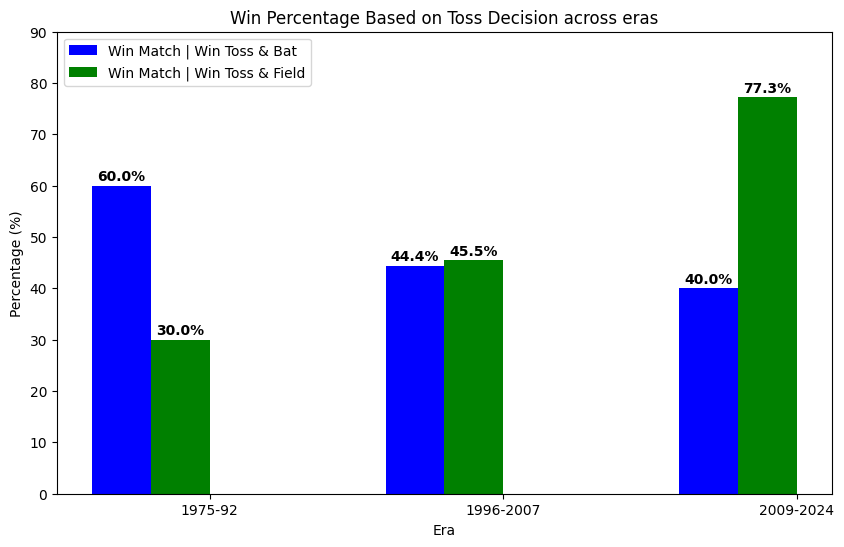

In [32]:
# Fifth Plot - Percentage of matches won based on decision taken after winning toss

# Data for grouped bar chart (win/loss rates by era)
eras = ["1975-92", "1996-2007", "2009-2024"]

# Calculate win/loss percentages
win_batting = [(3 / 5) * 100, (8 / 18) * 100, (10 / 25) * 100]  # W|B / WTB
win_fielding = [(3 / 10) * 100, (5 / 11) * 100, (17 / 22) * 100]  # W|F / WTF

x = np.arange(len(eras))
bar_width = 0.2

# Create grouped bar chart
plt.figure(figsize=(10, 6))
bars_wb = plt.bar(x - 1.5 * bar_width, win_batting, bar_width, label="Win Match | Win Toss & Bat", color="blue")
bars_wf = plt.bar(x - 0.5 * bar_width, win_fielding, bar_width, label="Win Match | Win Toss & Field", color="green")

# Add percentage labels on top of each bar
for bars in [bars_wb, bars_wf]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.1f}%",
                 ha="center", fontsize=10, fontweight="bold")

# Formatting
plt.xlabel("Era")
plt.ylabel("Percentage (%)")
plt.title("Win Percentage Based on Toss Decision across eras")
plt.xticks(x, eras)
plt.ylim(0, 90)
plt.legend()

# Show plot (if running locally)
plt.show()

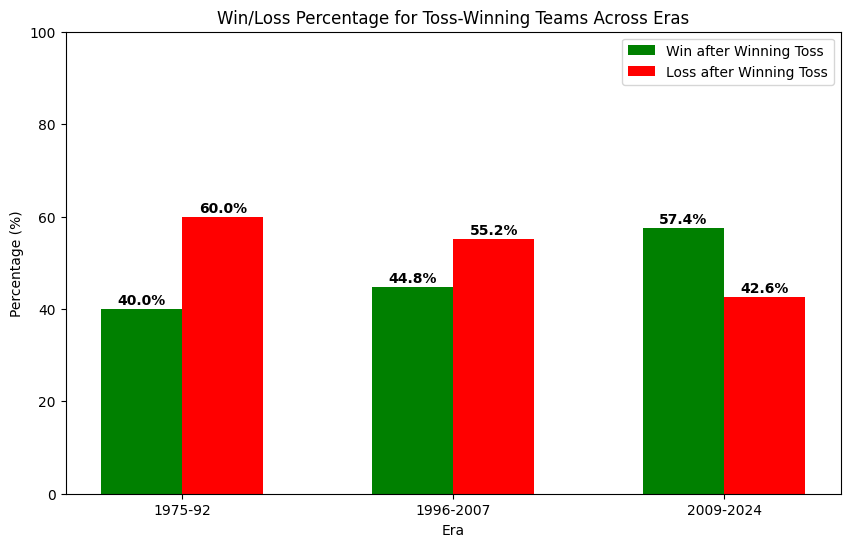

In [33]:
# Sixth Plot - Visualize team's overall win/loss percentage after winning toss across eras

# Calculate win/loss percentages for toss-winning teams
total_matches = [5 + 10, 18 + 11, 25 + 22]  # Total matches after winning the toss
total_wins = [3 + 3, 8 + 5, 10 + 17]  # Total wins after winning the toss
total_losses = [2 + 7, 10 + 6, 15 + 5]  # Total losses after winning the toss

win_percentage = [(wins / matches) * 100 for wins, matches in zip(total_wins, total_matches)]
loss_percentage = [(losses / matches) * 100 for losses, matches in zip(total_losses, total_matches)]

# Set up bar chart positions
x = np.arange(len(eras))
bar_width = 0.3

# Create grouped bar chart for win/loss % of toss-winning teams
plt.figure(figsize=(10, 6))
bars_win = plt.bar(x - bar_width/2, win_percentage, bar_width, label="Win after Winning Toss", color="green")
bars_loss = plt.bar(x + bar_width/2, loss_percentage, bar_width, label="Loss after Winning Toss", color="red")

# Add percentage labels on top of bars
for bars in [bars_win, bars_loss]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.1f}%",
                 ha="center", fontsize=10, fontweight="bold")

# Formatting
plt.xlabel("Era")
plt.ylabel("Percentage (%)")
plt.title("Win/Loss Percentage for Toss-Winning Teams Across Eras")
plt.xticks(x, eras)
plt.ylim(0, 100)
plt.legend()

# Show plot (if running locally)
plt.show()

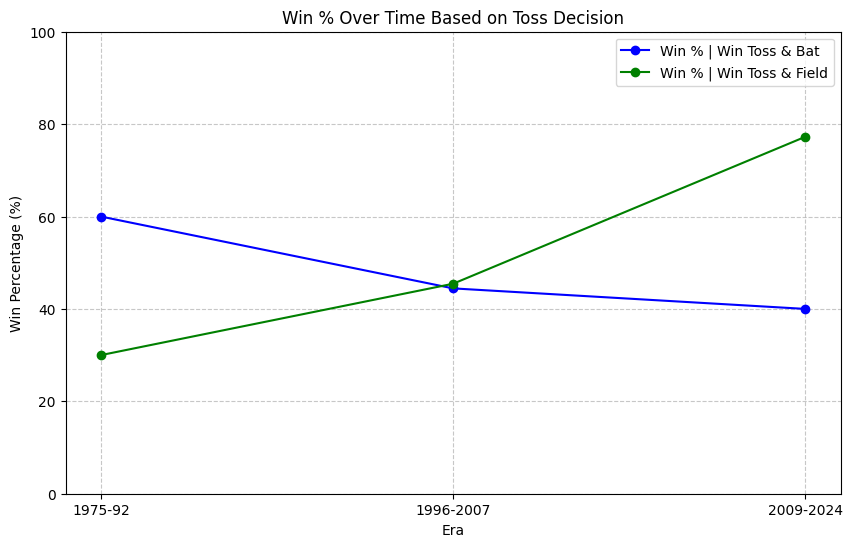

In [34]:
# Secenth Plot - Generate code for the line chart (Win % when batting first vs. fielding first over time)

# Data for line chart (Win % over time based on toss choice)
years = ["1975-92", "1996-2007", "2009-2024"]
win_rate_batting = [(3 / 5) * 100, (8 / 18) * 100, (10 / 25) * 100]  # W|B / WTB
win_rate_fielding = [(3 / 10) * 100, (5 / 11) * 100, (17 / 22) * 100]  # W|F / WTF

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(years, win_rate_batting, marker="o", linestyle="-", color="blue", label="Win % | Win Toss & Bat")
plt.plot(years, win_rate_fielding, marker="o", linestyle="-", color="green", label="Win % | Win Toss & Field")

# Formatting
plt.xlabel("Era")
plt.ylabel("Win Percentage (%)")
plt.title("Win % Over Time Based on Toss Decision")
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot (if running locally)
plt.show()

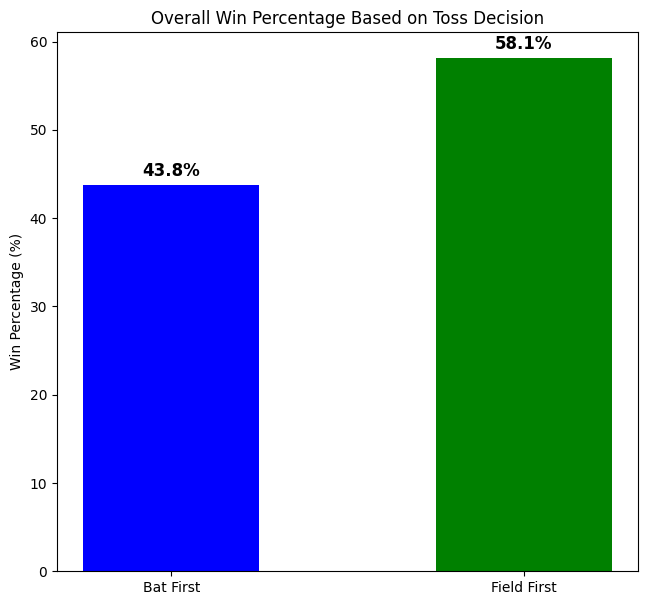

In [35]:
# Eigth Plot - Simple bar chart to compare overall win percentage after winning the toss and batting vs bowling

total_wtb = 5 + 18 + 25  # Total times teams won the toss and batted first
total_wtf = 10 + 11 + 22  # Total times teams won the toss and fielded first

total_wins_batting = 3 + 8 + 10  # Total wins when batting first
total_wins_fielding = 3 + 5 + 17  # Total wins when fielding first

# Calculate cumulative win percentage
cumulative_win_batting = (total_wins_batting / total_wtb) * 100
cumulative_win_fielding = (total_wins_fielding / total_wtf) * 100

# Create bar chart with narrower bars
plt.figure(figsize=(7.5, 7))
bars = plt.bar(["Bat First", "Field First"], [cumulative_win_batting, cumulative_win_fielding],
               color=["blue", "green"], width=0.5)  # Adjust bar width

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.1f}%",
             ha="center", fontsize=12, fontweight="bold")

# Formatting
plt.ylabel("Win Percentage (%)")
plt.title("Overall Win Percentage Based on Toss Decision")

# Show the plot (if running locally)
plt.show()